# **Final Task Home Credit x Rakamin Project Based Virtual Intership**
### Home Credit Scorecard Model

# **Problem Research**

### Objective
The primary focus is on developing a Home Credit Scorecard Model to predict loan default risk. By utilizing historical loan application data, the goal is to build a machine learning model that not only performs well but also generates actionable business insights for scorecard prediction. This includes data from various sources such as application data, previous credits, and payment history.

### Business Understanding
Credit risk poses significant potential losses for Home Credit, requiring a cautious approach to minimize these risks without losing potential clients. The Data Science team is tasked with identifying patterns in the data to reduce the risk of defaults while retaining valuable clients.

By identifying potential defaulters, Home Credit can set a lower threshold score for evaluation. Additionally, strategies can be devised to handle defaults if they occur, ensuring that the company's performance is not adversely affected.

### Goals
The company aims to enhance its ability to predict the creditworthiness of clients applying for loans, thereby maximizing profits by minimizing the likelihood of defaults. Moreover, understanding the factors that contribute to a client's potential to default enables the company to devise plans to manage high-risk clients effectively. This ensures that even if such clients pose a risk, the impact on the company’s performance is mitigated.

# **Data**
The dataset comprises seven different sources of data:

*   application_train/application_test: The main datasets containing information about each loan application, identified by `SK_ID_CURR`. The training set includes a `TARGET` variable indicating loan repayment status (0: repaid, 1: not repaid).
*   bureau: Data on clients' previous credits from other financial institutions, with each previous credit having its own row.
*   bureau_balance: Monthly data about previous credits in the bureau dataset, with each row representing one month of a previous credit.
*   previous_application: Information about clients' previous loan applications at Home Credit, identified by `SK_ID_PREV`.
*   POS_CASH_BALANCE: Monthly data on previous point-of-sale or cash loans, with each row representing one month of a previous loan.
*   credit_card_balance: Monthly data on previous credit cards, with each row representing one month of a credit card balance.
*   installments_payment: Payment history for previous loans, with each row representing one payment made or missed.

# **Data Pre-Processing**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Data Train
app_train = pd.read_csv('application_train.csv')
print('Data train shape: ', app_train.shape)
app_train.head()

Data train shape:  (190243, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Data test
app_test = pd.read_csv('application_test.csv')
print('Data test shape: ', app_test.shape)
app_test.head()

Data test shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
apps_train['TARGET'].value_counts()

TARGET
0    115865
1     10280
Name: count, dtype: int64

The target variable represents the prediction goal: a value of 0 indicates the loan was repaid on time, while a value of 1 signifies that the client experienced payment difficulties.

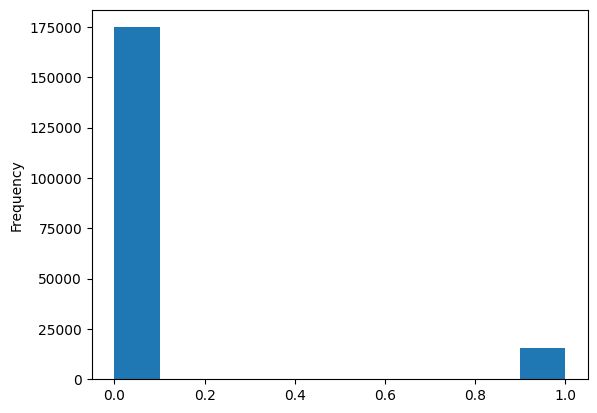

In [23]:
# Distribution plot
app_train['TARGET'].astype(int).plot.hist();

From this information, it is evident that we are dealing with an imbalanced class problem, as there are significantly more loans that were repaid on time compared to those that were not.

In [24]:
# Missing Value
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        return mis_val_table_ren_columns

In [25]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 92 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,132999,69.9
COMMONAREA_MODE,132999,69.9
COMMONAREA_AVG,132999,69.9
NONLIVINGAPARTMENTS_MEDI,132101,69.4
NONLIVINGAPARTMENTS_AVG,132101,69.4
NONLIVINGAPARTMENTS_MODE,132101,69.4
FONDKAPREMONT_MODE,130113,68.4
LIVINGAPARTMENTS_MEDI,130100,68.4
LIVINGAPARTMENTS_AVG,130100,68.4
LIVINGAPARTMENTS_MODE,130100,68.4


Missing values can be adress through imputation, use models like XGBoost that can handle missing values without requiring imputation, or just drop columns with a high percentage of missing values. But since we cannot determine their potential usefulness beforehand, we will keep all columns for now.

In [26]:
# One Hot Encoding
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [27]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (190243, 243)
Testing Features shape:  (48744, 239)


In [28]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (190243, 240)
Testing Features shape:  (48744, 239)


In [29]:
app_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,False,False,False,False,False,True,False,True,False,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,True,False,False,False,False,False,False,True,False,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,False,False,False,False,False,False,False,False,False,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,False,False,False,False,False,False,False,False,False,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190238,320574,0,0,0,1,270000.0,1024740.0,49428.0,900000.0,0.046220,...,False,False,False,False,False,False,False,False,False,0
190239,320575,0,0,1,0,90000.0,706500.0,20785.5,706500.0,0.010643,...,False,False,False,False,True,False,False,True,False,0
190240,320576,1,1,0,0,135000.0,180000.0,9000.0,180000.0,0.019101,...,False,False,False,False,False,True,False,True,False,0
190241,320577,1,1,0,1,225000.0,675000.0,33750.0,675000.0,0.072508,...,False,False,False,False,True,False,False,True,False,0


In [30]:
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,False,False,False,False,False,False,True,False,True,False
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,False,False,False,False,False,False,False,False,False,False
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,False,False,False,False,False,False,False,False,False,False
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,False,False,False,False,False,True,False,False,True,False
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,1,0,121500.0,412560.0,17473.5,270000.0,0.002042,...,False,False,False,False,False,False,False,False,False,False
48740,456222,0,0,0,2,157500.0,622413.0,31909.5,495000.0,0.035792,...,False,False,False,False,False,False,False,False,False,False
48741,456223,0,1,1,1,202500.0,315000.0,33205.5,315000.0,0.026392,...,False,False,False,False,False,False,True,False,True,False
48742,456224,0,0,0,0,225000.0,450000.0,25128.0,450000.0,0.018850,...,False,False,False,False,False,True,False,False,True,False


Correlation

In [31]:
correlations = app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OWN_CAR_AGE                                          0.040644
REG_CITY_NOT_LIVE_CITY                               0.042530
FLAG_DOCUMENT_3                                      0.043537
OCCUPATION_TYPE_Laborers                             0.044564
FLAG_EMP_PHONE                                       0.044999
NAME_EDUCATION_TYPE_Secondary / secondary special    0.050537
REG_CITY_NOT_WORK_CITY                               0.051119
DAYS_ID_PUBLISH                                      0.051725
CODE_GENDER_M                                        0.054478
DAYS_LAST_PHONE_CHANGE                               0.055411
NAME_INCOME_TYPE_Working                             0.056419
REGION_RATING_CLIENT                                 0.058180
REGION_RATING_CLIENT_W_CITY                          0.060280
DAYS_BIRTH                                           0.079239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

The `DAYS_BIRTH` variable has the highest positive correlation with the target (except for `TARGET` itself, which always has a correlation of 1 with itself). According to the documentation, `DAYS_BIRTH` represents the client's age in days, expressed as a negative value for some reason. While the correlation is positive, the actual feature value is negative, indicating that older clients are less likely to default on their loans (target == 0). To clarify this, we can take the absolute value of `DAYS_BIRTH`, which will then show a negative correlation.

In [32]:
### Effect of Age on Repayment
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07923936912054905

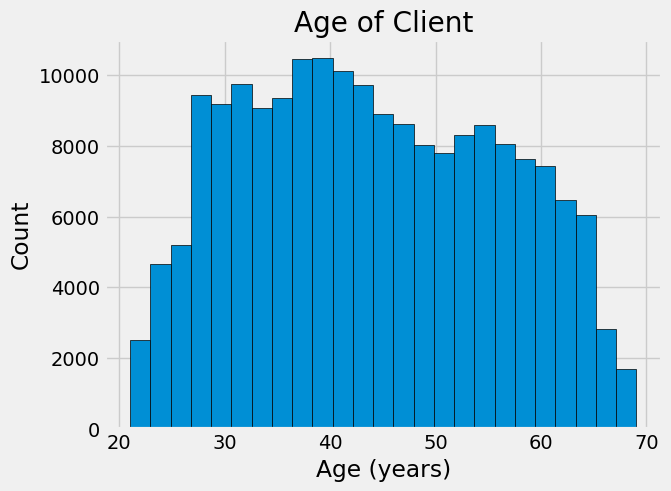

In [33]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

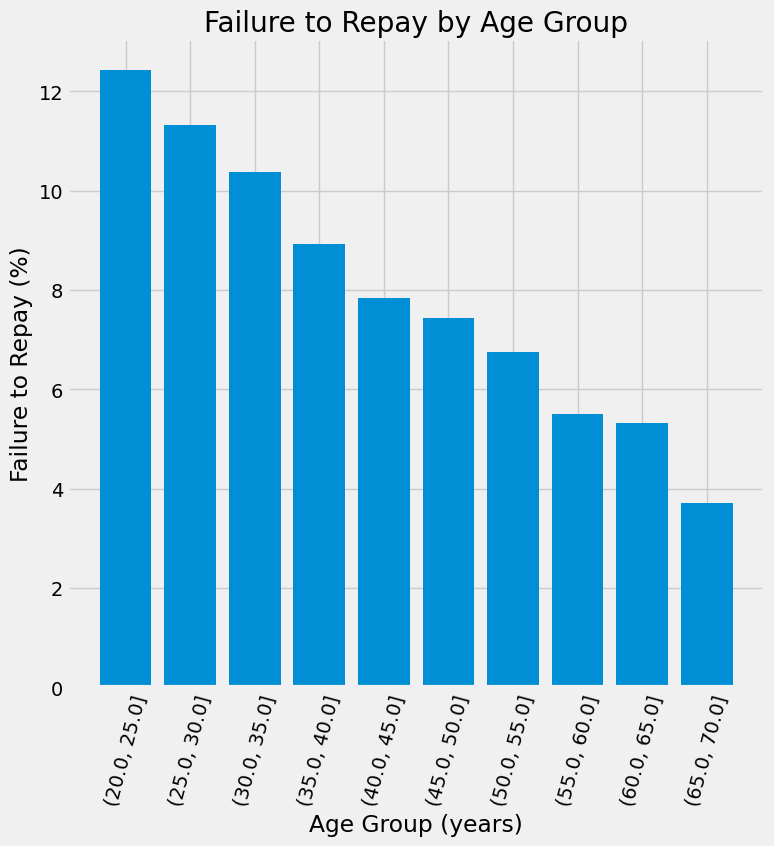

In [34]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

It can be seen that younger applicants are more likely to default on their loans. The default rate exceeds 10% for the youngest three age groups and falls below 5% for the oldest age group.

### Exterior Sources

The three variables exhibiting the most significant negative correlations with the target are `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`. These features, as described in the documentation, represent a "normalized score from external data source." While the exact nature of this scoring method is unclear, it appears to be a composite credit rating derived from various data sources.

Let's delve into these variables. Initially, we'll examine the correlations of the `EXT_SOURCE` features with the target variable and with each other.

In [35]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs
plt.figure(figsize = (8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

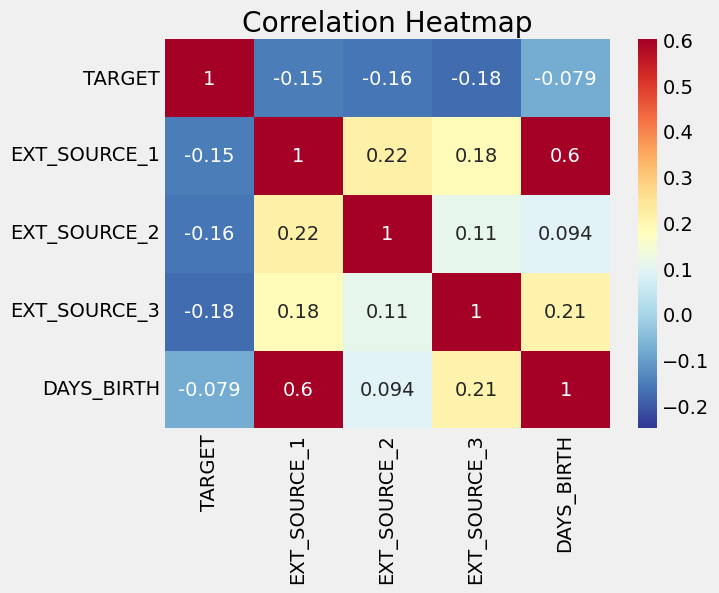

In [36]:
# Heatmap
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Each of the `EXT_SOURCE` variables displays negative correlations with the target, suggesting that as the value of `EXT_SOURCE` rises, clients are more inclined to repay the loan. Additionally, there is a positive correlation between `DAYS_BIRTH` and `EXT_SOURCE_1`, implying that client age might be one of the factors contributing to this score.

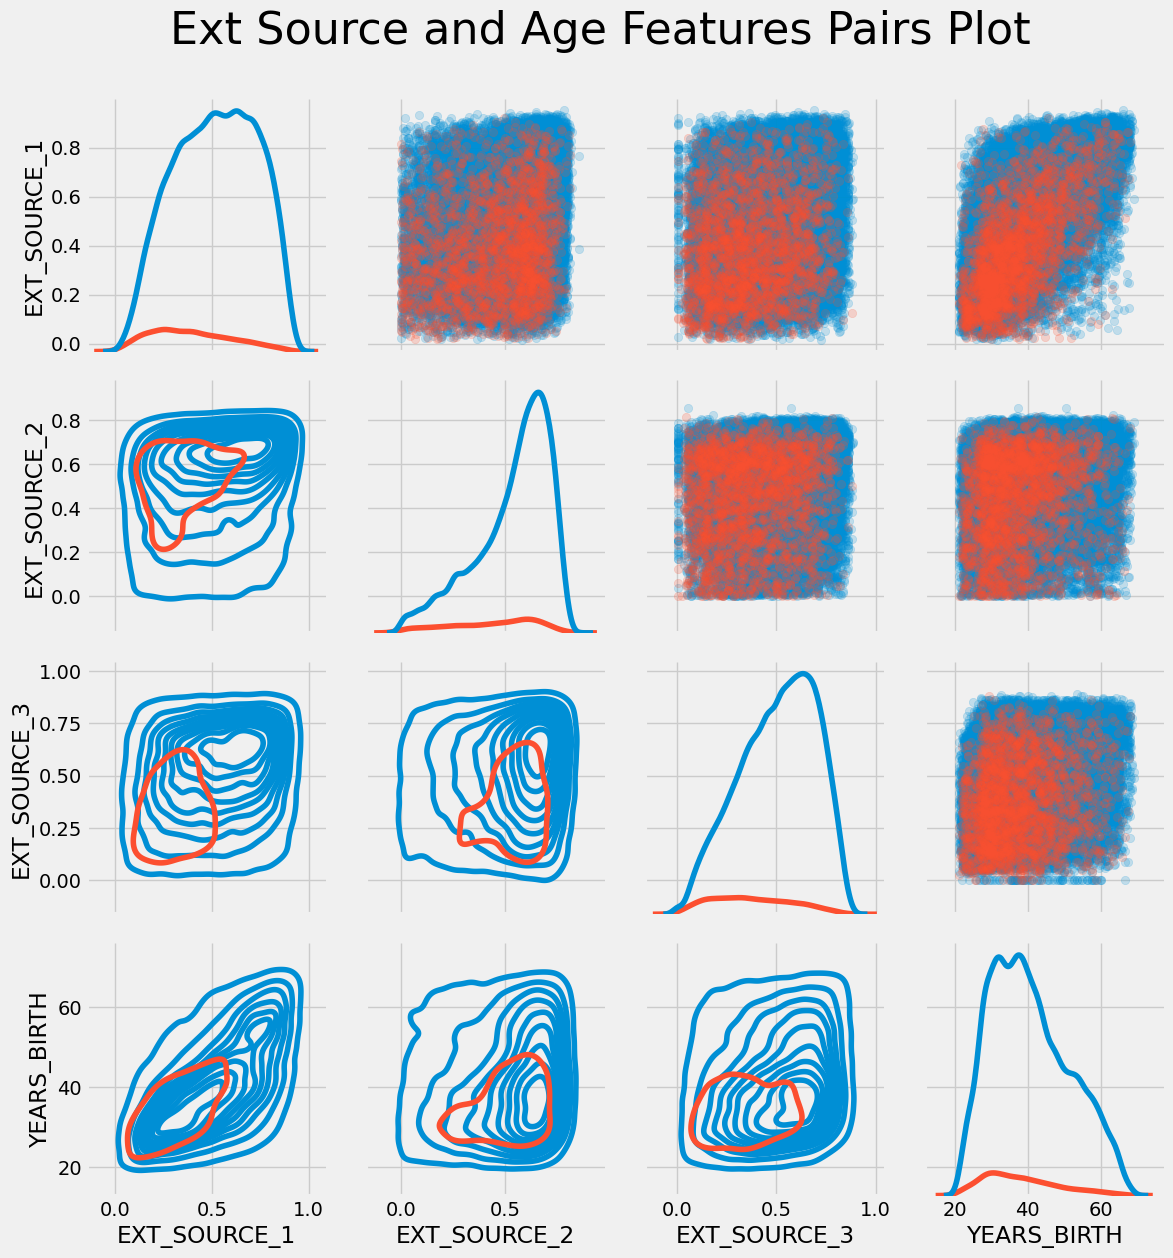

In [37]:
# Pair Plot
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']
plot_data = plot_data.dropna().loc[:100000, :]

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

grid = sns.PairGrid(data=plot_data, height=3, diag_sharey=False,
                    hue='TARGET',
                    vars=[x for x in list(plot_data.columns) if x != 'TARGET'])

grid.map_upper(plt.scatter, alpha=0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size=32, y=1.05)
plt.show()

In this visualization, red denotes loans that were not repaid, while blue represents those that were paid. It allows us to discern various relationships within the dataset. There seems to be a modest positive linear correlation between `EXT_SOURCE_1` and `DAYS_BIRTH` (or alternatively `YEARS_BIRTH`), suggesting that this feature may factor in the client's age.

In [ ]:
# Feature Engineering

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
imputer = SimpleImputer(strategy='median')
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns=['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)
poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (190243, 35)


In [39]:
feature_names = poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

print(feature_names[:15])

['1' 'EXT_SOURCE_1' 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'DAYS_BIRTH'
 'EXT_SOURCE_1^2' 'EXT_SOURCE_1 EXT_SOURCE_2' 'EXT_SOURCE_1 EXT_SOURCE_3'
 'EXT_SOURCE_1 DAYS_BIRTH' 'EXT_SOURCE_2^2' 'EXT_SOURCE_2 EXT_SOURCE_3'
 'EXT_SOURCE_2 DAYS_BIRTH' 'EXT_SOURCE_3^2' 'EXT_SOURCE_3 DAYS_BIRTH'
 'DAYS_BIRTH^2']


In [40]:
poly_features = pd.DataFrame(poly_features, columns=feature_names)
poly_features['TARGET'] = poly_target

poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193467
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.188490
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181004
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.175843
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.171490
EXT_SOURCE_1 EXT_SOURCE_2                -0.166200
EXT_SOURCE_1 EXT_SOURCE_3                -0.161396
EXT_SOURCE_2                             -0.161297
EXT_SOURCE_2 DAYS_BIRTH                  -0.157991
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156110
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.079239
DAYS_BIRTH^2   -0.077520
DAYS_BIRTH^3   -0.074997
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [41]:
# Create DataFrames with polynomial features
poly_features = pd.DataFrame(poly_features, columns=feature_names)
poly_features_test = pd.DataFrame(poly_features_test, columns=feature_names)

poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left')
app_test_poly = app_test.merge(poly_features_test, on='SK_ID_CURR', how='left')
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join='inner', axis=1)

print('Training data with polynomial features shape:', app_train_poly.shape)
print('Testing data with polynomial features shape:', app_test_poly.shape)

Training data with polynomial features shape: (190243, 274)
Testing data with polynomial features shape: (48744, 274)


In [42]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [43]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

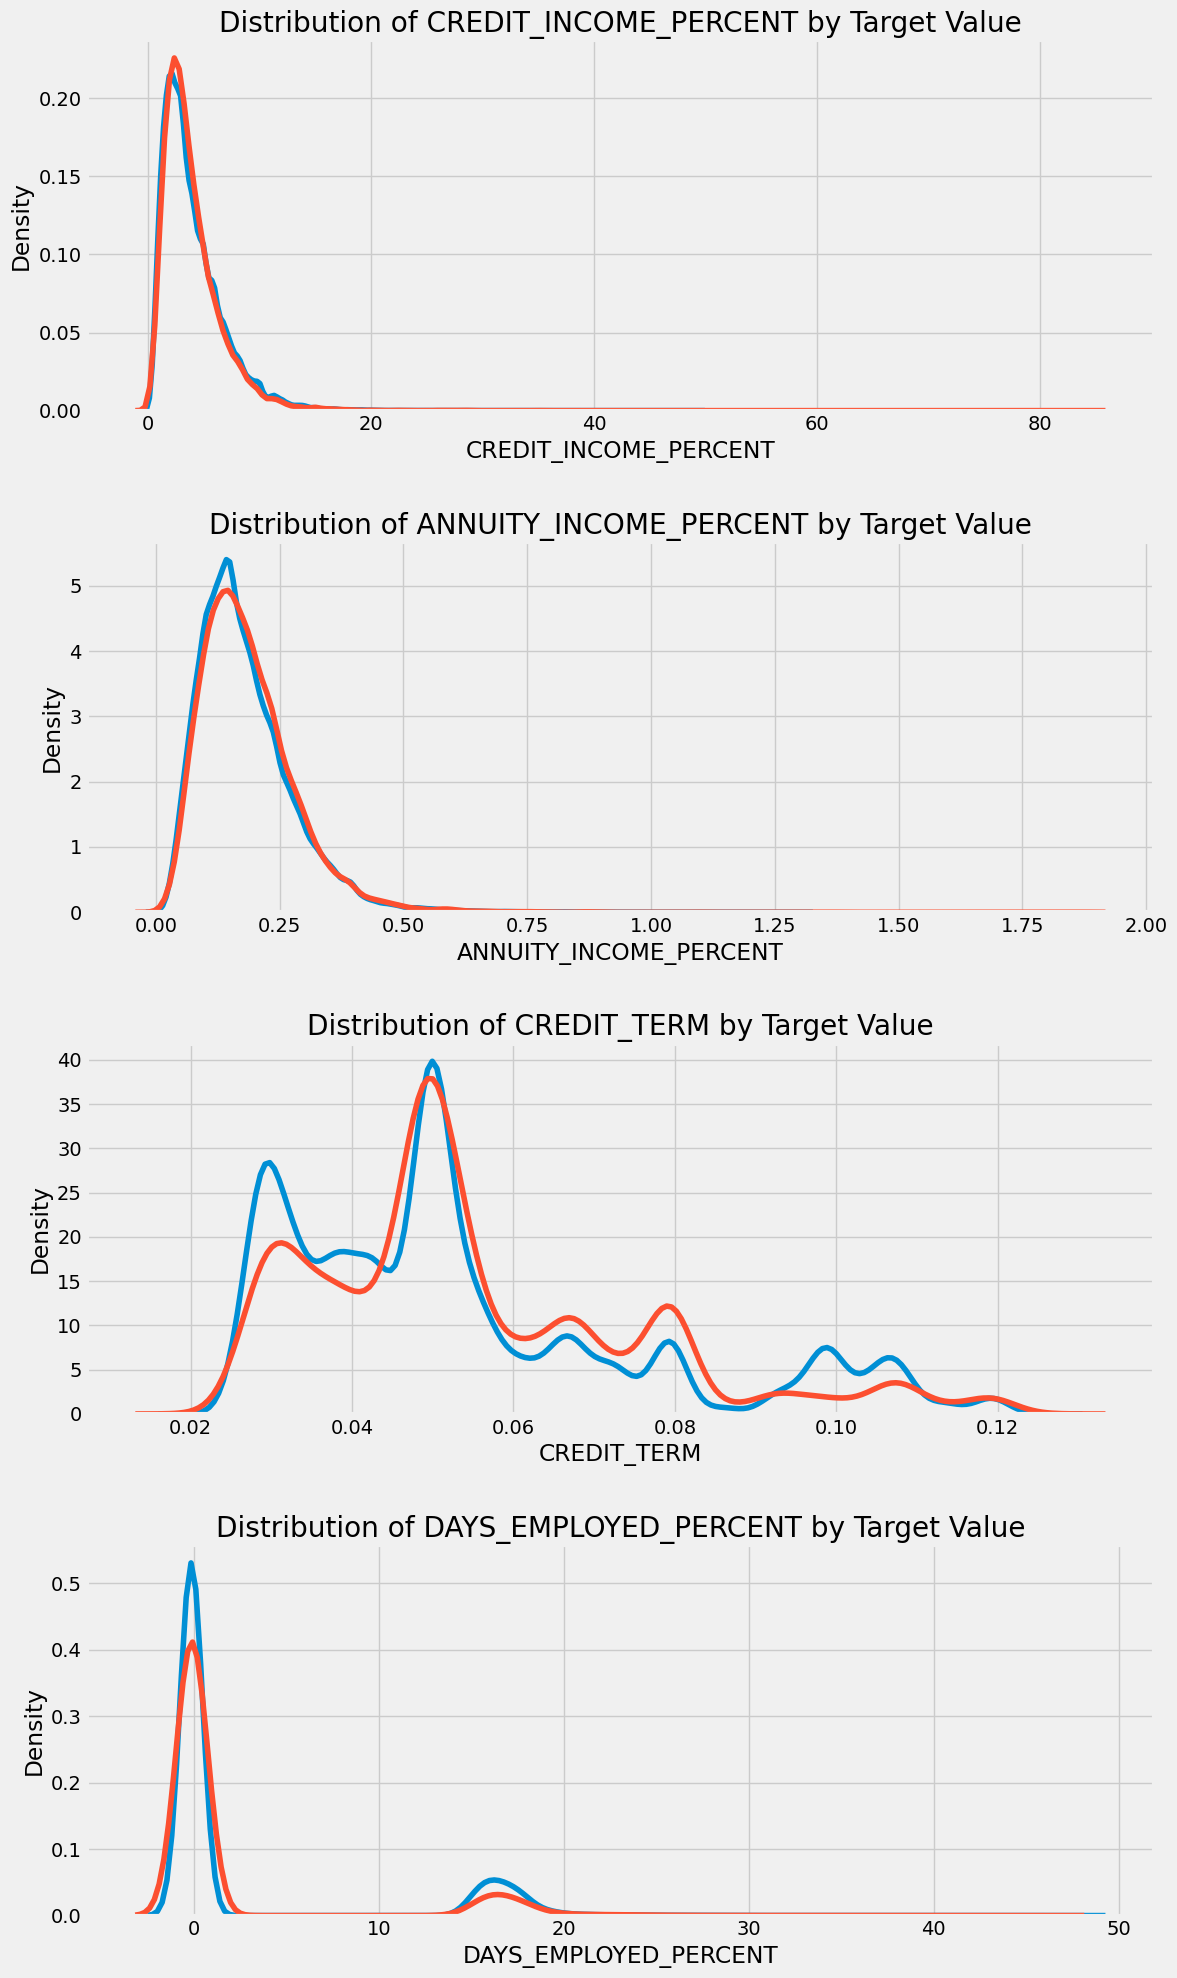

In [44]:
# Visualize New Variables

plt.figure(figsize = (12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):

    plt.subplot(4, 1, i + 1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')

    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

## Logistic Regression

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if 'TARGET' in app_train:
    train = app_train.drop(columns=['TARGET'])
else:
    train = app_train.copy()

features = list(train.columns)
test = app_test.copy()
imputer = SimpleImputer(strategy='median')
scaler = MinMaxScaler(feature_range=(0, 1))
train = imputer.fit_transform(train)
test = imputer.transform(test)
train = scaler.fit_transform(train)
test = scaler.transform(test)

print('Training data shape:', train.shape)
print('Testing data shape:', test.shape)

Training data shape: (190243, 239)
Testing data shape: (48744, 239)


In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [47]:
# Make predictions
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [48]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078023
1,100005,0.122523
2,100013,0.084819
3,100028,0.080023
4,100038,0.121963



The predictions represent a probability between 0 and 1 that the loan will not be repaid. If we were using these predictions to classify applicants, we could set a probability threshold for determining that a loan is risky.

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
random_forest.fit(train, train_labels)

feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

predictions = random_forest.predict_proba(test)[:, 1]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.1s finished


In [50]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

### Make Predictions using Engineered Features

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

poly_features_names = list(app_train_poly.columns)
imputer = SimpleImputer(strategy='median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

scaler = MinMaxScaler(feature_range=(0, 1))
poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)
random_forest_poly.fit(poly_features, train_labels)

predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.0s finished


In [52]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

In [53]:
# Testing Domain Feature
print("Columns in app_train_domain:", app_train_domain.columns)

if 'TARGET' in app_train_domain.columns:
    app_train_domain = app_train_domain.drop(columns='TARGET')
else:
    print("The 'TARGET' column does not exist in app_train_domain.")

domain_features_names = list(app_train_domain.columns)

imputer = SimpleImputer(strategy='median')
domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

scaler = MinMaxScaler(feature_range=(0, 1))
domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

random_forest_domain.fit(domain_features, train_labels)

feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

Columns in app_train_domain: Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'TARGET', 'CREDIT_INCOME_PERCENT',
       'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT'],
      dtype='object', length=244)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.5s finished


In [54]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

## Model Interpretation: Feature Importances

As a straightforward approach to identify the most significant variables, we can examine the feature importances of the random forest. Considering the correlations observed during exploratory data analysis, we anticipate that the `EXT_SOURCE` and `DAYS_BIRTH` variables will be among the most important.

In [55]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better.

    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance

    Returns:
        shows a plot of the 15 most importance features

        df (dataframe): feature importances sorted by importance (highest to lowest)
        with a column for normalized importance
        """

    df = df.sort_values('importance', ascending = False).reset_index()

    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k')

    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    return df

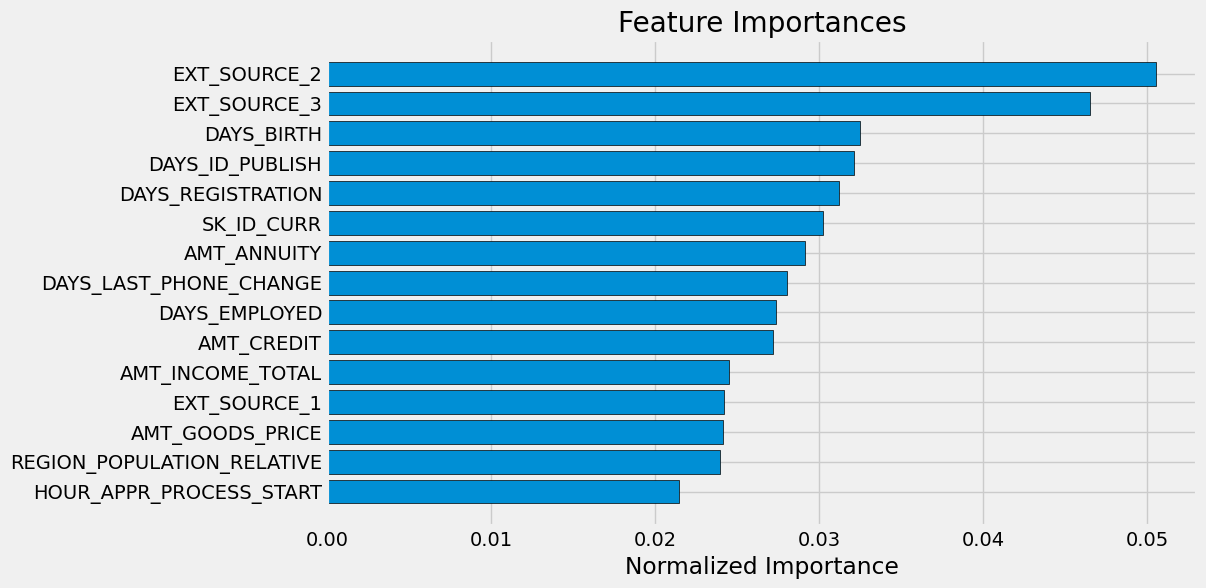

In [56]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)